# Setup

In [1]:
import json
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data_url = 'https://epochai.org/data/epochdb/all_systems.csv'
dtypes = {
    'Training compute (FLOP)': np.float64,
}
pcd_df = pd.read_csv(data_url, dtype=dtypes)
pcd_df['Decimal year'] = pd.to_datetime(pcd_df['Publication date']).dt.year + (pd.to_datetime(pcd_df['Publication date']).dt.month - 1) / 12 + (pd.to_datetime(pcd_df['Publication date']).dt.day - 1) / 365

In [3]:
pcd_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Training dataset,Training dataset notes,Abstract,...,Training time notes,Training time (hours),Batch size,Batch size notes,Base model,Finetune compute (FLOP),Training compute upper bound,Archived links,Benchmark data,Decimal year
0,Qwen 1.5 110B,Language,Alibaba,2024-04-25,Qwen1.5-110B: The First 100B+ Model of the Qwe...,https://qwenlm.github.io/blog/qwen1.5-110b/?re...,1.100000e+11,Unspecified unreleased,We pretrained the models with a large amount o...,The Qwen1.5-110B is the largest model in the Q...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.315753
1,phi-3-medium 14B,Language,Microsoft,2024-04-23,Phi-3 Technical Report: A Highly Capable Langu...,https://arxiv.org/abs/2404.14219,1.400000e+10,Unspecified unreleased,"we also trained phi-3-medium, a model with 14B...","We introduce phi-3-mini, a 3.8 billion paramet...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.310274
2,Llama 3-70B,Language,Meta AI,2024-04-18,Introducing Meta Llama 3: The most capable ope...,https://ai.meta.com/blog/meta-llama-3/\n\nhttp...,7.000000e+10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.296575
3,Mixtral 8x22B,Language,Mistral AI,2024-04-17,Mixtral 8x22B,https://mistral.ai/news/mixtral-8x22b/,1.760000e+11,NaN,NaN,Mixtral 8x22B is our latest open model. It set...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.293836
4,SIMA,"Games,Video",Google DeepMind,2024-04-17,Scaling Instructable Agents Across Many Simula...,https://arxiv.org/abs/2404.10179,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.293836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,Sequence-based pattern recognition,Vision,Massachusetts Institute of Technology (MIT),1955-03-01,Pattern recognition and modern computers,https://dl.acm.org/doi/10.1145/1455292.1455310,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.166667
1258,Self Organizing System,Other,Massachusetts Institute of Technology (MIT),1955-03-01,Generalization of pattern recognition in a sel...,https://dl.acm.org/doi/10.1145/1455292.1455309,2.250000e+02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.166667
1259,Genetic algorithm,Other,Institute for Advanced Study,1954-07-02,Numerical testing of evolution theories,https://link.springer.com/article/10.1007/BF01...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1954.502740
1260,SNARC,Robotics,Harvard University,1952-01-08,A Neural-Analogue Calculator Based upon a Prob...,https://en.wikipedia.org/wiki/Stochastic_neura...,4.000000e+01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1952.019178


In [4]:
pcd_df['Publication date'] = pd.to_datetime(pcd_df['Publication date'])

In [5]:
pcd_df.sort_values('Publication date', inplace=True)

In [6]:
pcd_df.dropna(subset=['Publication date', 'Notability criteria', 'Training compute (FLOP)'], inplace=True)

In [7]:
pcd_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Training dataset,Training dataset notes,Abstract,...,Training time notes,Training time (hours),Batch size,Batch size notes,Base model,Finetune compute (FLOP),Training compute upper bound,Archived links,Benchmark data,Decimal year
1261,Theseus,Robotics,Bell Laboratories,1950-07-02,Mighty Mouse,https://www.technologyreview.com/2018/12/19/13...,4.000000e+01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1950.502740
1255,Perceptron Mark I,Other,"Cornell Aeronautical Laboratory,Cornell Univer...",1957-01-01,The Perceptron—a perceiving and recognizing au...,https://blogs.umass.edu/brain-wars/files/2016/...,1.000000e+03,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957.000000
1254,Pandemonium (morse),Language,Massachusetts Institute of Technology (MIT),1959-02-01,Pandemonium: A Paradigm for Learning,https://aitopics.org/doc/classics:504E1BAC/,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959.083333
1253,Samuel Neural Checkers,Games,IBM,1959-07-01,Some studies in machine learning using the gam...,https://ieeexplore.ieee.org/abstract/document/...,1.600000e+01,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1959.500000
1251,Perceptron (1960),Vision,Cornell Aeronautical Laboratory,1960-03-30,Perceptron Simulation Experiments,https://www.semanticscholar.org/paper/Perceptr...,1.000000e+03,NaN,NaN,"An experimental simulation program, which has ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1960.246119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,FunSearch,"Language,Search",Google DeepMind,2023-12-14,Mathematical discoveries from program search w...,https://www.nature.com/articles/s41586-023-069...,1.500000e+10,NaN,"""The experiments carried out in this paper do ...",Large language models (LLMs) have demonstrated...,...,"Appendix A.5: ""To reproduce admissible set exp...",48.0,NaN,NaN,PaLM 2,0.0,NaN,NaN,NaN,2023.952283
22,MegaScale (Production),Language,"ByteDance,Peking University",2024-02-23,MegaScale: Scaling Large Language Model Traini...,https://arxiv.org/abs/2402.15627,5.300000e+11,NaN,NaN,"We present the design, implementation and engi...",...,"Speculative. Authors state ""several weeks"". Fo...",504.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.143607
15,Inflection-2.5,Language,Inflection AI,2024-03-07,Inflection-2.5: meet the world's best personal AI,https://inflection.ai/inflection-2-5,NaN,NaN,NaN,"At Inflection, our mission is to create a pers...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.183105
14,MM1-30B,Multimodal,Apple,2024-03-14,"MM1: Methods, Analysis & Insights from Multimo...",https://arxiv.org/abs/2403.09611,3.000000e+10,NaN,"Text, captioned images. See Table 2","In this work, we discuss building performant M...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.202283


In [8]:
outlier_window_size = 2  # years

In [9]:
start_large_scale_era = '2015-10-01'

# Top n all-time most compute-intensive

In [10]:
for n in range(1, 21):
    # Add a column to mark the top n models
    pcd_df[f'top_{n}_at_release'] = False
    
    for row, model in pcd_df.iterrows():
        # Filter for models released through the model's release date
        yearly_df = pcd_df[pcd_df['Decimal year'] <= model['Decimal year']]
        # get the top n models by compute
        top_n_models = yearly_df.nlargest(n, 'Training compute (FLOP)')
        # mark these models in the original dataframe
        pcd_df.loc[top_n_models.index, f'top_{n}_at_release'] = True

In [11]:
pcd_df.columns

Index(['System', 'Domain', 'Organization', 'Publication date', 'Reference',
       'Link', 'Parameters', 'Training dataset', 'Training dataset notes',
       'Abstract', 'Confidence', 'Model accessibility', 'Last modified',
       'Created By', 'Country (from Organization)',
       'Organization categorization', 'Authors', 'Parameters notes',
       'Training compute (FLOP)', 'Training compute notes',
       'Training dataset size (datapoints)', 'Notability criteria',
       'Notability criteria notes', 'Training hardware', 'Exclude',
       'Hardware quantity', 'Hardware utilization', 'Approach',
       'Training compute lower bound', 'Dataset size notes', 'Epochs',
       'Foundation model', 'Training data center', 'Finetune compute notes',
       'Training cloud compute vendor', 'Citations', 'Training time notes',
       'Training time (hours)', 'Batch size', 'Batch size notes', 'Base model',
       'Finetune compute (FLOP)', 'Training compute upper bound',
       'Archived links', 

In [12]:
np.sum(pcd_df['top_4_at_release'])

70

In [13]:
pcd_df_n = pcd_df[(pcd_df['Decimal year'] > 2015.75) & (pcd_df['Decimal year'] < 2024)].copy()

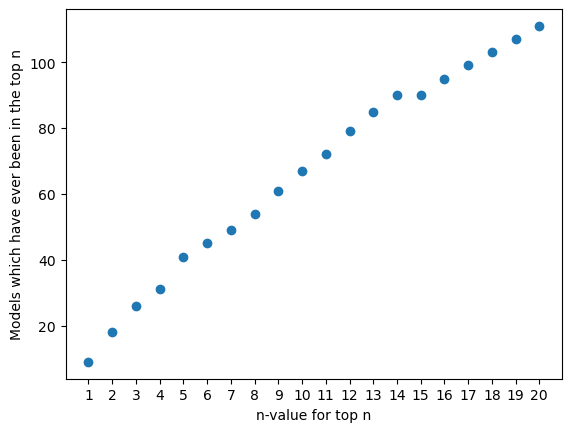

In [14]:
top_n = [np.sum(pcd_df_n[f'top_{n}_at_release']) for n in range(1, 21)]
plt.scatter(range(1, 21), top_n)
plt.xticks(ticks=range(1, 21))
plt.xlabel('n-value for top n')
plt.ylabel('Models which have ever been in the top n')
plt.show()

In [15]:
top_n_models = {}
for n in range(1, 21):
    models = pcd_df_n[pcd_df_n[f'top_{n}_at_release']]['System'].values.tolist()
    top_n_models[n] = set(models)

for n in range(20, 1, -1):
    top_n_models[n] = list(top_n_models[n].difference(top_n_models[n-1]))
top_n_models[1] = list(top_n_models[1])

In [16]:
with open('data/frontier_systems_by_top_n.json', 'w') as f:
    json.dump(top_n_models, f, indent=4)

# Default large scale systems

https://colab.research.google.com/drive/1PLGY5ErysqQMfy7Z08uIR2cTnnDgSaVR?usp=sharing

In [17]:
high_outliers_z_value_threshold = 0.76

In [18]:
large_scale_idx = set()

for index, row in pcd_df.iterrows():
  # Filter entries in a 2-year window around the paper
  window_size = pd.Timedelta(f'{outlier_window_size*52*7} days')
  half_window_size = window_size / 2
  mask = ( row['Publication date'] - half_window_size <= pcd_df['Publication date'] ) &\
        ( pcd_df['Publication date'] <= row['Publication date'] + half_window_size )
  window_df = pcd_df[mask].copy()

  if len(window_df) < 2: continue

  window_df['Training compute (FLOP) z scores'] = stats.zscore(np.log10(window_df['Training compute (FLOP)'].values))
  if window_df.loc[index, 'Training compute (FLOP) z scores'] > high_outliers_z_value_threshold:
    large_scale_idx.add(index)

large_scale_mask = pcd_df.index.isin(large_scale_idx) & (pcd_df['Publication date'] > start_large_scale_era)

In [19]:
large_scale_df = pcd_df[large_scale_mask]

In [20]:
large_scale_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Training dataset,Training dataset notes,Abstract,...,top_11_at_release,top_12_at_release,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release
986,AlphaGo Lee,Games,DeepMind,2016-01-27,Mastering the game of Go with deep neural netw...,https://www.nature.com/articles/nature16961,NaN,NaN,NaN,The game of Go has long been viewed as the mos...,...,True,True,True,True,True,True,True,True,True,True
953,GNMT,Language,Google,2016-09-26,Google's Neural Machine Translation System: Br...,https://arxiv.org/abs/1609.08144,2.780000e+08,NaN,NaN,Neural Machine Translation (NMT) is an end-to-...,...,True,True,True,True,True,True,True,True,True,True
952,Xception,Vision,Google,2016-10-07,Xception: Deep Learning with Depthwise Separab...,https://arxiv.org/abs/1610.02357,2.285595e+07,JFT,"Also ImageNet, but JFT is significantly larger",We present an interpretation of Inception modu...,...,True,True,True,True,True,True,True,True,True,True
946,NASv3 (CIFAR-10),Vision,Google Brain,2016-11-05,Neural Architecture Search with Reinforcement ...,https://arxiv.org/abs/1611.01578,3.740000e+07,NaN,NaN,Neural networks are powerful and flexible mode...,...,True,True,True,True,True,True,True,True,True,True
931,AlphaGo Master,Games,DeepMind,2017-01-01,Mastering the game of Go without human knowledge,https://www.nature.com/articles/nature24270,NaN,NaN,NaN,A long-standing goal of artificial intelligenc...,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Qwen-72B,Language,Alibaba,2023-11-30,NaN,https://huggingface.co/Qwen/Qwen-72B,7.200000e+10,NaN,"""It is pretrained on over 3 trillion tokens, i...",Qwen-72B is the 72B-parameter version of the l...,...,True,True,True,True,True,True,True,True,True,True
64,Gemini Ultra,Multimodal,Google DeepMind,2023-12-06,Gemini: A Family of Highly Capable Multimodal ...,https://storage.googleapis.com/deepmind-media/...,NaN,NaN,"""Gemini models are trained on a dataset that i...",This report introduces a new family of multimo...,...,True,True,True,True,True,True,True,True,True,True
22,MegaScale (Production),Language,"ByteDance,Peking University",2024-02-23,MegaScale: Scaling Large Language Model Traini...,https://arxiv.org/abs/2402.15627,5.300000e+11,NaN,NaN,"We present the design, implementation and engi...",...,True,True,True,True,True,True,True,True,True,True
15,Inflection-2.5,Language,Inflection AI,2024-03-07,Inflection-2.5: meet the world's best personal AI,https://inflection.ai/inflection-2-5,NaN,NaN,NaN,"At Inflection, our mission is to create a pers...",...,True,True,True,True,True,True,True,True,True,True


In [21]:
for system in large_scale_df['System'][::-1]:
  print(system)

Llama 3-70B
Inflection-2.5
MegaScale (Production)
Gemini Ultra
Qwen-72B
Inflection-2
Grok-1
ChatGLM3
Falcon-180B
Llama 2-70B
Claude 2
PaLM 2
GPT-4
LLaMA-65B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
U-PaLM (540B)
BlenderBot 3
GLM-130B
Minerva (540B)
Parti
OPT-175B
Flamingo
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
AlphaCode
ERNIE 3.0 Titan
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
HyperCLOVA
GOAT
ByT5-XXL
ProtT5-XXL
Meta Pseudo Labels
Switch
DALL-E
mT5-XXL
GShard (dense)
iGPT-XL
GPT-3 175B (davinci)
Turing-NLG
Meena
ContextNet + Noisy Student
OpenAI Five
OpenAI Five Rerun
AlphaStar
T5-11B
Megatron-LM (8.3B)
Megatron-BERT
RoBERTa Large
XLNet
MnasNet-A3
MnasNet-A1 + SSDLite
GPT-2 (1.5B)
BigGAN-deep 512x512
FTW
ResNeXt-101 32x48d
IMPALA
AmoebaNet-A (F=448)
AlphaZero
AlphaGo Zero
OpenAI TI7 DOTA 1v1
JFT
Libratus
AlphaGo Master
NASv3 (CIFAR-10)
Xception
GNMT
AlphaGo Lee


# Percentiles (CURRENT CHOICE)

In [22]:
frontier_systems_by_percentile = {}
percentile_interval = 5
for percentile in range(95, -5, -percentile_interval):
  print(percentile)
  percentile_compute_low = np.zeros(len(pcd_df))
  percentile_compute_high = np.zeros(len(pcd_df))
  # Iterate through each row and calculate the 2-year moving average for each date
  for i, (index, row) in enumerate(pcd_df.iterrows()):
    # Define the 2-year window
    start_date = row['Publication date'] - pd.DateOffset(years=outlier_window_size/2)
    end_date = row['Publication date'] + pd.DateOffset(years=outlier_window_size/2)

    # Filter the DataFrame for this window
    window_df = pcd_df[(pcd_df['Publication date'] >= start_date) & (pcd_df['Publication date'] <= end_date)]

    percentile_compute_low[i] = np.percentile(window_df['Training compute (FLOP)'], percentile)
    percentile_compute_high[i] = np.percentile(window_df['Training compute (FLOP)'], percentile + percentile_interval)

  frontier_systems_flag = pcd_df['Training compute (FLOP)'] > np.array(percentile_compute_low)
  extra_frontier_systems_flag = pcd_df['Training compute (FLOP)'] <= np.array(percentile_compute_high)

  # raise Exception("Edit the following line if you want to consider models released after 2023-12-31.")
  extra_frontier_systems = pcd_df['System'][frontier_systems_flag & extra_frontier_systems_flag & (pcd_df['Publication date'] > pd.to_datetime('2015-09-30'))].values

  frontier_systems_by_percentile[percentile] = list(extra_frontier_systems)

95
90
85
80
75
70
65
60
55
50
45
40
35
30
25
20
15
10
5
0


In [23]:
frontier_systems_by_percentile

{95: ['GNMT',
  'AlphaGo Master',
  'AlphaGo Zero',
  'AlphaZero',
  'ResNeXt-101 32x48d',
  'FTW',
  'Megatron-BERT',
  'OpenAI Five',
  'Meena',
  'GPT-3 175B (davinci)',
  'Megatron-Turing NLG 530B',
  'ERNIE 3.0 Titan',
  'PaLM (540B)',
  'Minerva (540B)',
  'GPT-4',
  'Gemini Ultra',
  'MegaScale (Production)'],
 90: ['NASv3 (CIFAR-10)',
  'T5-11B',
  'AlphaStar',
  'mT5-XXL',
  'Switch',
  'Gopher (280B)',
  'Chinchilla',
  'U-PaLM (540B)',
  'GPT-3.5 (text-davinci-003)',
  'PaLM 2',
  'Claude 2',
  'Inflection-2',
  'Inflection-2.5'],
 85: ['AlphaGo Fan',
  'AlphaGo Lee',
  'Megatron-LM (8.3B)',
  'OpenAI Five Rerun',
  'Turing-NLG',
  'Yuan 1.0',
  'GLaM',
  'LaMDA',
  'OPT-175B',
  'BLOOM-176B',
  'Falcon-180B',
  'Grok-1'],
 80: ['JFT',
  'OpenAI TI7 DOTA 1v1',
  'AmoebaNet-A (F=448)',
  'IMPALA',
  'BigGAN-deep 512x512',
  'GPT-2 (1.5B)',
  'XLNet',
  'iGPT-XL',
  'DALL-E',
  'ByT5-XXL',
  'HyperCLOVA',
  'AlphaCode',
  'ST-MoE',
  'Flamingo',
  'Parti',
  'GLM-130B',
  'Ble

In [24]:
# Save to JSON
with open('data/frontier_systems_by_window_percentile.json', 'w') as f:
    json.dump(frontier_systems_by_percentile, f, indent=4)

In [25]:
total_num_systems = 0
for percentile, systems in frontier_systems_by_percentile.items():
  total_num_systems += len(systems)
  print(percentile, 'to', percentile + percentile_interval)
  print(len(systems), "systems")
  print(f'Total systems above {percentile}th percentile: {total_num_systems}')
  for system in systems[::-1]:
    print(system)
  print()

95 to 100
17 systems
Total systems above 95th percentile: 17
MegaScale (Production)
Gemini Ultra
GPT-4
Minerva (540B)
PaLM (540B)
ERNIE 3.0 Titan
Megatron-Turing NLG 530B
GPT-3 175B (davinci)
Meena
OpenAI Five
Megatron-BERT
FTW
ResNeXt-101 32x48d
AlphaZero
AlphaGo Zero
AlphaGo Master
GNMT

90 to 95
13 systems
Total systems above 90th percentile: 30
Inflection-2.5
Inflection-2
Claude 2
PaLM 2
GPT-3.5 (text-davinci-003)
U-PaLM (540B)
Chinchilla
Gopher (280B)
Switch
mT5-XXL
AlphaStar
T5-11B
NASv3 (CIFAR-10)

85 to 90
12 systems
Total systems above 85th percentile: 42
Grok-1
Falcon-180B
BLOOM-176B
OPT-175B
LaMDA
GLaM
Yuan 1.0
Turing-NLG
OpenAI Five Rerun
Megatron-LM (8.3B)
AlphaGo Lee
AlphaGo Fan

80 to 85
21 systems
Total systems above 80th percentile: 63
Llama 3-70B
Qwen-72B
ChatGLM3
Llama 2-70B
BlenderBot 3
GLM-130B
Parti
Flamingo
ST-MoE
AlphaCode
HyperCLOVA
ByT5-XXL
DALL-E
iGPT-XL
XLNet
GPT-2 (1.5B)
BigGAN-deep 512x512
IMPALA
AmoebaNet-A (F=448)
OpenAI TI7 DOTA 1v1
JFT

75 to 80
15 sys

# Distance from compute record at the time

In [26]:
ooms_from_frontier = 2

In [27]:
current_max = 0
running_max = np.zeros(len(pcd_df))
for i, compute in enumerate(pcd_df['Training compute (FLOP)']):
  if compute > current_max:
    running_max[i] = compute
    current_max = compute
  else:
    running_max[i] = current_max
running_max

array([4.00000000e+01, 6.94894938e+05, 6.00000000e+08, 6.00000000e+08,
       7.20000000e+08, 7.20000000e+08, 7.20000000e+08, 7.20000000e+08,
       7.20000000e+08, 2.76640650e+10, 2.83280026e+10, 2.83280026e+10,
       8.11870414e+10, 8.11870414e+10, 1.82321576e+13, 1.82321576e+13,
       1.82321576e+13, 2.10080000e+13, 2.10080000e+13, 6.30000000e+13,
       1.30389876e+15, 1.30389876e+15, 1.30389876e+15, 1.30389876e+15,
       1.30389876e+15, 3.41463600e+15, 6.14400000e+16, 6.14400000e+16,
       6.14400000e+16, 2.73196800e+17, 2.73196800e+17, 6.00000000e+17,
       6.00000000e+17, 6.00000000e+17, 6.00000000e+17, 6.00000000e+17,
       6.00000000e+17, 6.00000000e+17, 1.34092800e+18, 1.34092800e+18,
       1.34092800e+18, 1.34092800e+18, 1.34092800e+18, 3.41107200e+18,
       3.41107200e+18, 3.41107200e+18, 9.25344000e+18, 9.25344000e+18,
       5.60000000e+19, 5.60000000e+19, 5.60000000e+19, 5.60000000e+19,
       5.60000000e+19, 5.60000000e+19, 5.60000000e+19, 5.60000000e+19,
      

In [28]:
pcd_df['Frontier training compute (FLOP)'] = running_max

In [29]:
pcd_df['Frontier system'] = (pcd_df['Publication date'] > start_large_scale_era) & (np.log10(pcd_df['Frontier training compute (FLOP)']) - np.log10(pcd_df['Training compute (FLOP)']) <= ooms_from_frontier)
pcd_df[['System', 'Frontier system']]

,System,Frontier system
1261,Theseus,False
1255,Perceptron Mark I,False
1254,Pandemonium (morse),False
1253,Samuel Neural Checkers,False
1251,Perceptron (1960),False
...,...,...
56,FunSearch,False
22,MegaScale (Production),True
15,Inflection-2.5,True
14,MM1-30B,False


In [30]:
frontier_df = pcd_df[pcd_df['Frontier system']]
frontier_df

,System,Domain,Organization,Publication date,Reference,Link,Parameters,Training dataset,Training dataset notes,Abstract,...,top_13_at_release,top_14_at_release,top_15_at_release,top_16_at_release,top_17_at_release,top_18_at_release,top_19_at_release,top_20_at_release,Frontier training compute (FLOP),Frontier system
992,DeepSpeech2 (English),Speech,Baidu Research - Silicon Valley AI Lab,2015-12-08,Deep Speech 2: End-to-End Speech Recognition i...,https://arxiv.org/abs/1512.02595,3.800000e+07,NaN,NaN,We show that an end-to-end deep learning appro...,...,True,True,True,True,True,True,True,True,3.800000e+20,True
990,ResNet-152 (ImageNet),Vision,Microsoft,2015-12-10,Deep Residual Learning for Image Recognition,https://arxiv.org/abs/1512.03385,6.000000e+07,ILSVRC 2012 subset of ImageNet,"They won ILSVRC 2015, but actually the classif...",Deeper neural networks are more difficult to t...,...,True,True,True,True,True,True,True,True,3.800000e+20,True
986,AlphaGo Lee,Games,DeepMind,2016-01-27,Mastering the game of Go with deep neural netw...,https://www.nature.com/articles/nature16961,NaN,NaN,NaN,The game of Go has long been viewed as the mos...,...,True,True,True,True,True,True,True,True,1.900000e+21,True
953,GNMT,Language,Google,2016-09-26,Google's Neural Machine Translation System: Br...,https://arxiv.org/abs/1609.08144,2.780000e+08,NaN,NaN,Neural Machine Translation (NMT) is an end-to-...,...,True,True,True,True,True,True,True,True,6.900000e+21,True
952,Xception,Vision,Google,2016-10-07,Xception: Deep Learning with Depthwise Separab...,https://arxiv.org/abs/1610.02357,2.285595e+07,JFT,"Also ImageNet, but JFT is significantly larger",We present an interpretation of Inception modu...,...,True,True,True,True,True,True,True,True,6.900000e+21,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,Qwen-72B,Language,Alibaba,2023-11-30,NaN,https://huggingface.co/Qwen/Qwen-72B,7.200000e+10,NaN,"""It is pretrained on over 3 trillion tokens, i...",Qwen-72B is the 72B-parameter version of the l...,...,True,True,True,True,True,True,True,True,2.100000e+25,True
64,Gemini Ultra,Multimodal,Google DeepMind,2023-12-06,Gemini: A Family of Highly Capable Multimodal ...,https://storage.googleapis.com/deepmind-media/...,NaN,NaN,"""Gemini models are trained on a dataset that i...",This report introduces a new family of multimo...,...,True,True,True,True,True,True,True,True,5.000000e+25,True
22,MegaScale (Production),Language,"ByteDance,Peking University",2024-02-23,MegaScale: Scaling Large Language Model Traini...,https://arxiv.org/abs/2402.15627,5.300000e+11,NaN,NaN,"We present the design, implementation and engi...",...,True,True,True,True,True,True,True,True,5.000000e+25,True
15,Inflection-2.5,Language,Inflection AI,2024-03-07,Inflection-2.5: meet the world's best personal AI,https://inflection.ai/inflection-2-5,NaN,NaN,NaN,"At Inflection, our mission is to create a pers...",...,True,True,True,True,True,True,True,True,5.000000e+25,True


In [31]:
for system in frontier_df['System'][::-1]:
  print(system)

Llama 3-70B
Inflection-2.5
MegaScale (Production)
Gemini Ultra
Qwen-72B
Inflection-2
Grok-1
Yi-34B
Skywork-13B
ChatGLM3
Falcon-180B
Llama 2-70B
Claude 2
xTrimoPGLM -100B
PaLM 2
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-7B
LLaMA-65B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
Taiyi-Stable Diffusion
U-PaLM (540B)
Whisper
PaLI
BlenderBot 3
GLM-130B
AlexaTM 20B
ESM2-15B
Minerva (540B)
Parti
CoCa
UL2
OPT-175B
Flamingo
Stable Diffusion (LDM-KL-8-G)
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
GPT-NeoX-20B
RETRO-7B
AlphaCode
ERNIE 3.0 Titan
XGLM-7.5B
XGLM
GLaM
Gopher (280B)
Student of Games
Florence
BASIC-L
T0-XXL
Yuan 1.0
Megatron-Turing NLG 530B
AlphaFold-Multimer
HyperCLOVA
FLAN 137B
SEER
GOAT
HuBERT
ERNIE 3.0
ALIGN
DeBERTa
CoAtNet
ByT5-XXL
CogView
ProtBERT-BFD
ProtT5-XXL
ProtT5-XXL-BFD
PLUG
M6-T
Meta Pseudo Labels
MSA Transformer
Switch
DALL-E
CLIP (ViT L/14@336px)
ViT-Huge/14
mT5-XXL
Conformer + Wav2vec 2.0 + Noisy Student
GShard (dense)
iGPT-L
iGPT-XL
GPT-3 175B (davinci)
Turing-NL

# Constant threshold

In [32]:
compute_threshold = 1e23

In [33]:
above_threshold = pcd_df[pcd_df['Training compute (FLOP)'] > compute_threshold]

In [34]:
print(len(above_threshold), 'systems')
for system in above_threshold['System'][::-1]:
  print(system)

51 systems
Llama 3-70B
MM1-30B
Inflection-2.5
MegaScale (Production)
FunSearch
Gemini Ultra
Qwen-72B
Inflection-2
Nemotron-3-8B
Grok-1
Yi-34B
Skywork-13B
ChatGLM3
Falcon-180B
Llama 2-70B
Claude 2
xTrimoPGLM -100B
PaLM 2
BloombergGPT
PanGu-Σ
GPT-4
Falcon-40B
LLaMA-65B
ViT-22B
GPT-3.5 (text-davinci-003)
Galactica
BLOOM-176B
U-PaLM (540B)
BlenderBot 3
GLM-130B
AlexaTM 20B
Minerva (540B)
Parti
UL2
OPT-175B
Flamingo
PaLM (540B)
Chinchilla
ST-MoE
LaMDA
AlphaCode
ERNIE 3.0 Titan
GLaM
Gopher (280B)
Yuan 1.0
Megatron-Turing NLG 530B
HyperCLOVA
GPT-3 175B (davinci)
Meena
AlphaGo Zero
AlphaGo Master
